#Prepare notebook

In [1]:
pip -q install transformers datasets    

In [2]:
!nvidia-smi

Tue Jan  4 06:30:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# load tensorboard extension
%load_ext tensorboard

# Patronizing and Condescending Language Detection


Baselines from [the paper](https://arxiv.org/pdf/2011.08320.pdf):


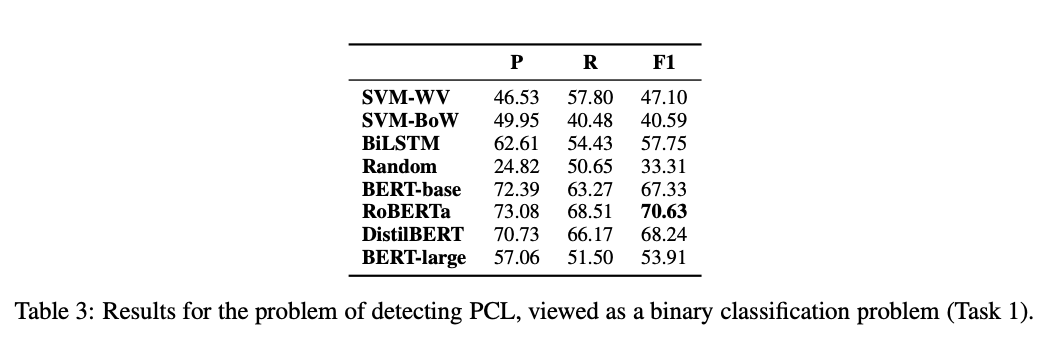


## Prepare Dataset

In [4]:
import pandas as pd
import numpy as np

##Test/Training set from Reconstruct and RoBERTa baseline train-dev dataset.ipynb. from their github

In [81]:
!wget https://gist.githubusercontent.com/Sirwe-Saeedi/861272ade2973f4accac8f486b834dd4/raw/4532ac187c427a280bf55f72c7c49d88268c4662/TestSet.csv
!wget https://gist.githubusercontent.com/Sirwe-Saeedi/1fc5f7dacf6fc776c39083e0c4d7096d/raw/c591a43674a218ae64a2dbb8646325f3ea03b4cb/TrainingSet.csv
!wget https://gist.githubusercontent.com/Sirwe-Saeedi/a3507ca903e2492483c067222fb88a19/raw/450c5c47852b8404a0a30f7e0d12e540b05c897c/Pegasus_training_dataset.csv

--2022-01-05 01:39:37--  https://gist.githubusercontent.com/Sirwe-Saeedi/861272ade2973f4accac8f486b834dd4/raw/4532ac187c427a280bf55f72c7c49d88268c4662/TestSet.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 570478 (557K) [text/plain]
Saving to: ‘TestSet.csv.4’

TestSet.csv.4       100%[===================>] 557.11K  --.-KB/s    in 0.03s   

2022-01-05 01:39:38 (20.0 MB/s) - ‘TestSet.csv.4’ saved [570478/570478]

--2022-01-05 01:39:38--  https://gist.githubusercontent.com/Sirwe-Saeedi/1fc5f7dacf6fc776c39083e0c4d7096d/raw/c591a43674a218ae64a2dbb8646325f3ea03b4cb/TrainingSet.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.github

#Not Augmented training set

In [82]:
df_training = pd.read_csv('./TrainingSet.csv', sep='\t', index_col=None)
df_test = pd.read_csv('./TestSet.csv', sep='\t', index_col=False)

df_training['par_id'].duplicated().value_counts()  #Output:   False    8375
df_training = df_training.dropna().reset_index()
#df_training.isnull().sum()
df_training

,index,par_id,text,label
0,0,4341,"the scheme saw an estimated 150,000 children f...",1
1,1,4136,durban 's homeless communities reconciliation ...,1
2,2,10352,the next immediate problem that cropped up was...,1
3,3,8279,far more important than the implications for t...,1
4,4,1164,to strengthen child-sensitive social protectio...,1
...,...,...,...,...
8370,8370,8380,rescue teams search for survivors on the rubbl...,0
8371,8371,8381,the launch of ' happy birthday ' took place la...,0
8372,8372,8382,"the unrest has left at least 20,000 people dea...",0
8373,8373,8383,you have to see it from my perspective . i may...,0


#Pegasus Augmented training set

In [83]:
df_training_pegasus = pd.read_csv('./Pegasus_training_dataset.csv', sep='\t', index_col=None)

# df_training_pegasus['par_id'].duplicated().value_counts()  #Output:   False    8375
# df_training_pegasus = df_training.dropna().reset_index()
df_training_pegasus

,text,par_id,label
0,"Between 1920 and 1974 150,000 children from po...",4341,1
1,"Between 1920 and 1974 an estimated 150,000 chi...",4341,1
2,"An estimated 150,000 children from poor famili...",4341,1
3,"Between 1920 and 1974 150,000 children from po...",4341,1
4,"Between 1920 and 1974 150,000 children from po...",4341,1
...,...,...,...
83745,"One time, we went to the scene of the triple m...",8384,0
83746,There was a time when we went to the scene of ...,8384,0
83747,One time we went to the scene of the triple mu...,8384,0
83748,We went to the scene of the murders. A woman w...,8384,0


#Test set

In [84]:
df_test['par_id'].duplicated().value_counts()  #Output:   False    2094
df_test

,par_id,text,label
0,4046,we also know that they can benefit by receivin...,1
1,1279,pope francis washed and kissed the feet of mus...,1
2,8330,many refugees do n't want to be resettled anyw...,1
3,4063,"""budding chefs , like """" fred """" , """" winston ...",1
4,4089,"""in a 90-degree view of his constituency , one...",1
...,...,...,...
2089,10462,"the sad spectacle , which occurred on saturday...",0
2090,10463,""""""" the pakistani police came to our house and...",0
2091,10464,"""when marie o'donoghue went looking for a spec...",0
2092,10465,"""sri lankan norms and culture inhibit women fr...",0


In [96]:
df_test[df_test['text'].isna()]
df_test['text'][434] = "It was None and I replaced it with this sentence."
df_test[df_test['text'].isna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,par_id,text,label


# Binary Classification


In [85]:
import os
# os.environ['WANDB_PROJECT'] = 'pcl-binary'

In [86]:
import torch
from tqdm.notebook import tqdm

from transformers import RobertaTokenizer, BertTokenizer
from torch.utils.data import TensorDataset

from transformers import RobertaForSequenceClassification, BertForSequenceClassification

import seaborn as sns

In [87]:
len(df_training_pegasus), df_training_pegasus['label'].sum()

(83750, 7940)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


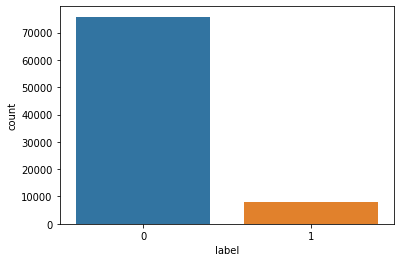

In [88]:
sns.countplot(df_training_pegasus['label']);


###HTML signs deletion

In [13]:
#Fix me: DO something for deleting html signs in the text
#df_pcl['paragraph'] = [df_pcl['paragraph'][i].replace('<h>', '') for i in range(10468)] makes it worse

# Training using Huggingface API

In [14]:
#Delete combined features
# df_pcl_selected = df_pcl
# def combine_features(row) :
#   return '</s>'.join(row.drop(['labels','label'],axis=0).apply(str).values)
# df_pcl_selected['combined_features'] = df_pcl_selected.apply(combine_features, axis = 1)
# # df_pcl_selected = df_pcl_selected[['combined_features','labels']]
# df_pcl_selected

In [15]:
# valid_size = 1000
# duplicate = df_training_pegasus['text'].duplicated()
# duplicate.sum()
# none_duplicate = df_training.drop(duplicate.index, axis=0)

# df_pcl_valid = df_training.sample(valid_size, random_state = 42)
# df_pcl_train = df_training.drop(df_pcl_valid.index, axis=0)
# df_pcl_train

# Replicate rows with lable of 1 in training dataset

In [89]:
replicated_df_training_pegasus = pd.concat([df_training_pegasus[df_training_pegasus['label'] == 1]]*8, ignore_index=True)

In [90]:
df_training_pegasus = pd.concat([df_training_pegasus, replicated_df_training_pegasus])
len(df_training_pegasus), len(replicated_df_training_pegasus), df_training_pegasus.label.sum() #Number of 1 lable in pegasus training set

(147270, 63520, 71460)

In [91]:
df_training_pegasus.sample(frac = 1, random_state = 42)

,text,par_id,label
45609,We hope that the children will be able to be r...,9689,1
46821,The crucial time was bought by those who were ...,4304,0
5813,The poor families face double-digit inflation ...,8966,1
9975,The city is vulnerable to an aerial threat and...,223,0
515,The dignity dreams project helps schoolgirls i...,4963,1
...,...,...,...
36129,What is the best advice for Nigerian women? Th...,8783,1
19944,Thousands of Jamaicans have been living on the...,2798,1
48182,Every family should be covered by the program....,8630,1
63117,The charge was related to a charity event held...,5440,1


##Create dataset


In [97]:
from datasets import Dataset
raw_datasets_valid = Dataset.from_pandas(df_test[['text','label']])
raw_datasets_train = Dataset.from_pandas(df_training_pegasus[['text','label']])
raw_datasets_train, raw_datasets_valid

(Dataset({
     features: ['text', 'label', '__index_level_0__'],
     num_rows: 147270
 }), Dataset({
     features: ['text', 'label'],
     num_rows: 2094
 }))

In [98]:
len(df_training_pegasus), df_training_pegasus.label.sum(), len(df_test), df_test.label.sum()

(147270, 71460, 2094, 199)

#RoBERTa

In [94]:
# FIXME: Ali - Idea: Try zero shot, few shot, fine-tuning with GPT-3
from transformers import AutoTokenizer
model_name = 'roberta-large'
# model_name = 'bert-base-uncased'
# model_name = 'roberta-large-openai-detector' #FIXME: Ali - Idea: Try other larger models
tokenizer = AutoTokenizer.from_pretrained(model_name)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/roberta-large/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/dea67b44b38d504f2523f3ddb6acb601b23d67bee52c942da336fa1283100990.94cae8b3a8dbab1d59b9d4827f7ce79e73124efa6bb970412cd503383a95f373
Model config RobertaConfig {
  "_name_or_path": "roberta-large",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 1,
  "use_c

In [99]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets_train = raw_datasets_train.map(tokenize_function, batched=True)
tokenized_datasets_valid = raw_datasets_valid.map(tokenize_function, batched=True)
#tokenized_datasets_train = tokenized_datasets_train.remove_columns(["__index_level_0__"])
#tokenized_datasets_valid = tokenized_datasets_valid.remove_columns(["__index_level_0__"])
tokenized_datasets_train

  0%|          | 0/148 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

Dataset({
    features: ['__index_level_0__', 'attention_mask', 'input_ids', 'label', 'text'],
    num_rows: 147270
})

In [100]:
# small_dataset_size = 100
# small_train_dataset = tokenized_datasets_train.shuffle(seed=42).select(range(small_dataset_size))
# small_eval_dataset = tokenized_datasets_valid.shuffle(seed=42).select(range(small_dataset_size))
full_train_dataset = tokenized_datasets_train
full_eval_dataset = tokenized_datasets_valid

In [24]:
# model_bert = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
# model_bert

In [25]:
# model_bert()

In [26]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifie

In [27]:
from datasets import load_metric, list_metrics
# list_metrics()

In [28]:
from transformers import TrainingArguments
run_name = 'roberta_large_cosine_lr1e-5'
# https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments
training_args = TrainingArguments(run_name,
                                  num_train_epochs=2,
                                  save_total_limit=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy= "epoch",
                                  per_device_train_batch_size=4,
                                  gradient_accumulation_steps=1,
                                  warmup_steps=4000,
                                  lr_scheduler_type='cosine') 
# , resume_from_checkpoint='full_roberta_lr5e-5' , per_device_train_batch_size=4
# FIXME: Ali - Idea: use schedulers with different learning_rate (higher or lower) 
# TODO: Ali - add Gdrive to save checkpoints in gdrive
# TODO: Ali - use `resume_from_checkpoint` to load model from last checkpoint

In [29]:
from transformers import Trainer
import numpy as np
# from datasets import load_metric

# f1_metric = load_metric('f1')

# accuracy_metric = load_metric("accuracy")

In [30]:
# model.roberta.encoder

In [31]:
# df_pcl_valid['labels'].values[:10]

In [32]:
# f1_metric.compute(predictions=y_pred.predictions.argmax(axis=1), references=df_pcl_valid['labels'].values[10:20])

In [101]:
from sklearn.metrics import f1_score
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return {'f1': f1_score(labels, predictions, average='macro')}
    # return f1_metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model, args=training_args,
    train_dataset=full_train_dataset,
    eval_dataset=full_eval_dataset,
    # train_dataset=small_train_dataset,
    # eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [34]:
!nvidia-smi

Tue Jan  4 06:30:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    35W / 250W |   2489MiB / 16280MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
# Wandb accces code: 6eac997ed11cad663510778e5e1c33388cdac6c5
# swswswswsw

In [37]:
# import gc
# gc.collect()
# torch.cuda.empty_cache()

In [38]:
# For WandB results checkout https://wandb.ai/alipanahi/pcl-binary 
%tensorboard --logdir 'roberta_large_cosine_lr1e-5'

Reusing TensorBoard on port 6006 (pid 217), started 0:02:36 ago. (Use '!kill 217' to kill it.)

<IPython.core.display.Javascript object>

In [39]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, __index_level_0__.
***** Running training *****
  Num examples = 147270
  Num Epochs = 2
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 73636


Epoch,Training Loss,Validation Loss,F1
1,0.027600,0.797332,0.751241
2,0.000000,1.095919,0.740475


Saving model checkpoint to roberta_large_cosine_lr1e-5/checkpoint-500
Configuration saved in roberta_large_cosine_lr1e-5/checkpoint-500/config.json
Model weights saved in roberta_large_cosine_lr1e-5/checkpoint-500/pytorch_model.bin
Saving model checkpoint to roberta_large_cosine_lr1e-5/checkpoint-1000
Configuration saved in roberta_large_cosine_lr1e-5/checkpoint-1000/config.json
Model weights saved in roberta_large_cosine_lr1e-5/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to roberta_large_cosine_lr1e-5/checkpoint-1500
Configuration saved in roberta_large_cosine_lr1e-5/checkpoint-1500/config.json
Model weights saved in roberta_large_cosine_lr1e-5/checkpoint-1500/pytorch_model.bin
Deleting older checkpoint [roberta_large_cosine_lr1e-5/checkpoint-500] due to args.save_total_limit
Saving model checkpoint to roberta_large_cosine_lr1e-5/checkpoint-2000
Configuration saved in roberta_large_cosine_lr1e-5/checkpoint-2000/config.json
Model weights saved in roberta_large_cosine_lr1e

TrainOutput(global_step=73636, training_loss=0.06997784162590118, metrics={'train_runtime': 66112.1344, 'train_samples_per_second': 4.455, 'train_steps_per_second': 1.114, 'total_flos': 2.7449106375462912e+17, 'train_loss': 0.06997784162590118, 'epoch': 2.0})

In [40]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 2093
  Batch size = 8


{'epoch': 2.0,
 'eval_f1': 0.7404746939630662,
 'eval_loss': 1.095918893814087,
 'eval_runtime': 124.9752,
 'eval_samples_per_second': 16.747,
 'eval_steps_per_second': 2.096}

In [102]:
y_pred = trainer.predict(full_eval_dataset)

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 2094
  Batch size = 8


In [103]:
y_pred

PredictionOutput(predictions=array([[ 8.35058  , -8.810233 ],
       [-7.9008574,  8.430714 ],
       [ 8.339998 , -8.809012 ],
       ...,
       [ 8.348501 , -8.812863 ],
       [ 8.350959 , -8.816066 ],
       [ 8.353973 , -8.814088 ]], dtype=float32), label_ids=array([1, 1, 1, ..., 0, 0, 0]), metrics={'test_loss': 1.095395565032959, 'test_f1': 0.740484295979357, 'test_runtime': 125.1171, 'test_samples_per_second': 16.736, 'test_steps_per_second': 2.094})

In [104]:
y = y_pred.predictions.argmax(axis=1)
y, len(y)

(array([0, 1, 0, ..., 0, 0, 0]), 2094)

In [105]:
np.savetxt('y_pred.csv', y, fmt='%s')

In [106]:
df_preds=pd.DataFrame(y_pred.label_ids)
df_preds.columns = ['label']
df_preds

,label
0,1
1,1
2,1
3,1
4,1
...,...
2089,0
2090,0
2091,0
2092,0


In [107]:
from google.colab import files
files.download('y_pred.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [109]:
labels2file([[k] for k in list(df_preds['label'])], 'task1.txt')

In [110]:
#Zip submission File
!zip submission.zip task1.txt

updating: task1.txt (deflated 99%)


In [49]:
# del trainer
# import gc
# gc.collect()
# torch.cuda.empty_cache()

In [50]:
# mkdir -p /content/drive/MyDrive/full_roberta_lr5e-5/checkpoint-5500/

In [51]:
# cp -r /content/full_roberta_lr5e-5/checkpoint-5500/ /content/drive/MyDrive/full_roberta_lr5e-5/checkpoint-5500/

In [52]:
# import wandb
# wandb.init(project='pcl-binary')

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(df_pcl_valid['labels'].values, df_preds.values, target_names=['0','1']))

In [ ]:
# from sklearn.metrics import f1_score
# f1_score(df_pcl_valid['labels'].values, df_preds.values, average='macro')

In [ ]:
# df_pcl_valid['labels'].values[:10]